In [1]:
import librosa
import librosa.display

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
from mpl_toolkits import mplot3d
%matplotlib inline

import seaborn as sns

# Voice detection

In [3]:
import os
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

Reading data

In [4]:
loaded_data = defaultdict(list)

directory = '../Big Data/Voice data'
for target in os.listdir(directory):
    path = os.path.join(directory, target)
    if os.path.isdir(path):
        for filename in os.listdir(path):
            if filename.endswith('.m4a'):
                filepath = os.path.join(path, filename)
                y, _ = librosa.load(filepath)
                y, _ = librosa.effects.trim(y)
                loaded_data[target].append(y)


In [5]:
X = []
loaded_targets = []
for i, val in enumerate(loaded_data.values()):
    X += val
    loaded_targets += [i] * len(val)
loaded_targets = np.array(loaded_targets)

max_len = max(map(len, X))
# making all tensors of same length
for i in range(len(X)):
    X[i] = np.concatenate((X[i], np.zeros(max_len - len(X[i]))), axis=None)

helper function for visualisation

In [13]:
def display_proj(x, y, name=''):
    f = plt.figure(figsize=(16, 6))
    f.suptitle(name)

    palette = np.array(sns.hls_palette(len(set(y)), l=.6, s=0.9))  
    # We create a scatter plot.
    plt.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[y.astype(np.int)])
    
    plt.axis('tight')
    plt.show()

# PCA

In [7]:
from sklearn.decomposition import PCA

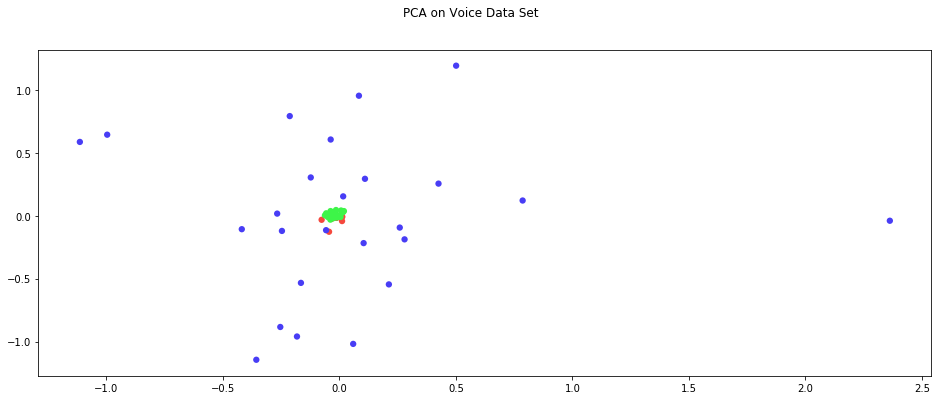

In [15]:
pca_result = PCA(n_components=3).fit_transform(X)

display_proj(pca_result[:,:2], loaded_targets, 'PCA on Voice Data Set')

# t-SNE

In [16]:
import sklearn
from sklearn.manifold import TSNE

In [17]:
tsne_result = TSNE().fit_transform(X)

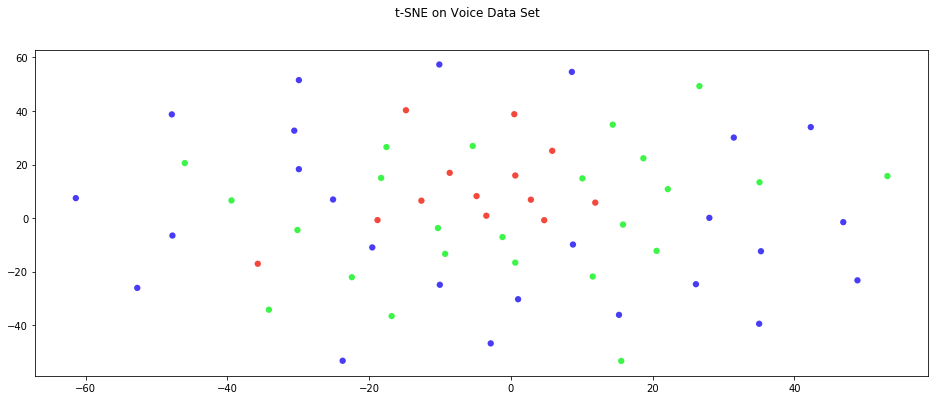

In [18]:
display_proj(tsne_result, loaded_targets, 't-SNE on Voice Data Set')

In [19]:
t = loaded_targets.reshape((len(loaded_targets),1))
X_modified = np.concatenate((pca_result, t), axis=1)

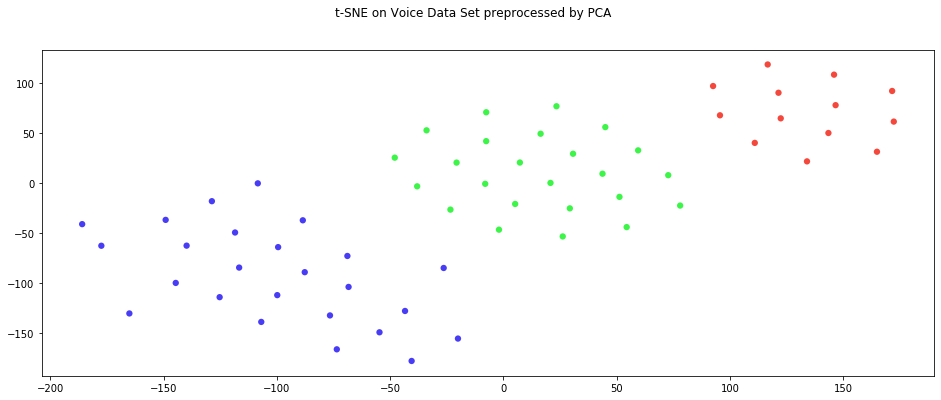

In [20]:
tsne_result_mod = TSNE().fit_transform(X_modified)

display_proj(tsne_result_mod, loaded_targets, 't-SNE on Voice Data Set preprocessed by PCA')

# UMAP

In [21]:
import umap

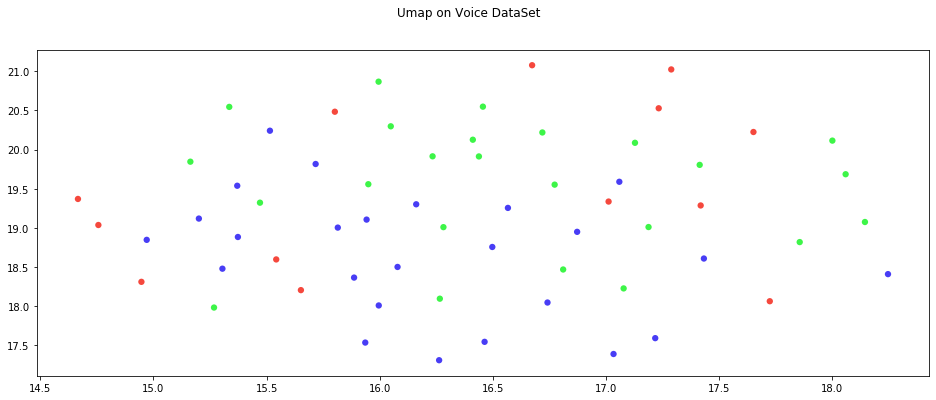

In [22]:
umap_result = umap.UMAP().fit_transform(X)

display_proj(umap_result, loaded_targets, 'Umap on Voice DataSet')

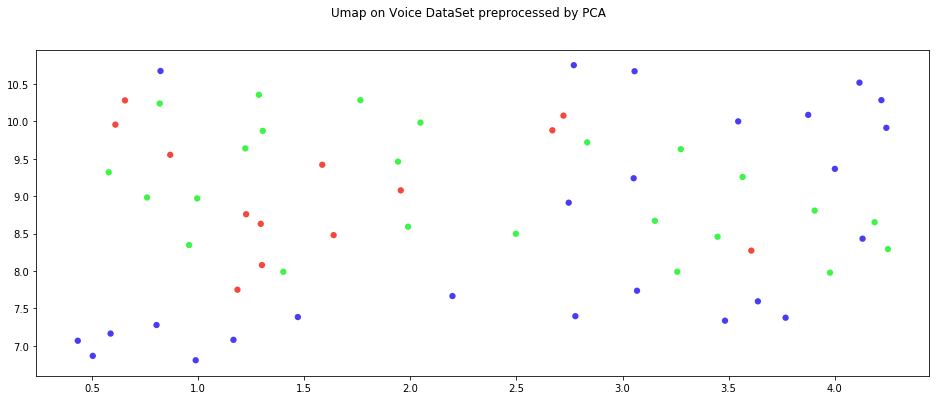

In [28]:
umap_result_pca = umap.UMAP().fit_transform(pca_result)

display_proj(umap_result_pca, loaded_targets, 'Umap on Voice DataSet preprocessed by PCA')

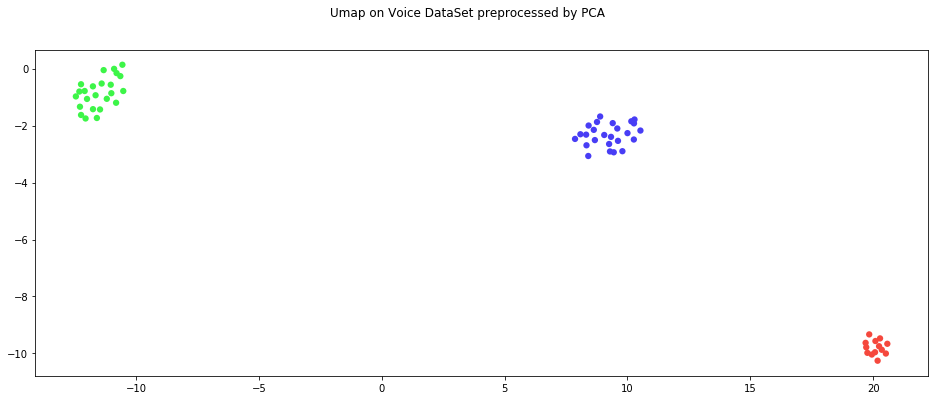

In [23]:
umap_result_mod = umap.UMAP().fit_transform(X_modified)

display_proj(umap_result_mod, loaded_targets, 'Umap on Voice DataSet preprocessed by PCA')